In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import streamlit as st
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
import joblib

In [2]:
# nltk.download('all')

In [3]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [4]:
# this is a comment
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [5]:
df = df.drop(columns=['article_link'])

In [6]:
df

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
...,...,...
28614,1,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


In [8]:
# renaming the cols
df.rename(columns={'is_sarcastic':'sarcas','headline':'text'},inplace=True)
df.sample(5)

,sarcas,text
11632,0,"we're thankful for curvy models, curly hair an..."
20562,0,reinvest in california seniors to boost local ...
11146,1,completely unrealistic tv character has comple...
19060,1,pence passing time during trump's speech by me...
20586,0,"nope, christian bale is not playing batman in ..."


In [9]:
# check for duplicate values
df.duplicated().sum()

116

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df['num_characters'] = df['text'].apply(len)

C:\Users\KEMENPAREKRAF\AppData\Local\Temp\ipykernel_5208\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [13]:
df

,sarcas,text,num_characters
0,1,thirtysomething scientists unveil doomsday clo...,61
1,0,dem rep. totally nails why congress is falling...,79
2,0,eat your veggies: 9 deliciously different recipes,49
3,1,inclement weather prevents liar from getting t...,52
4,1,mother comes pretty close to using word 'strea...,61
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,44
28615,1,internal affairs investigator disappointed con...,87
28616,0,the most beautiful acceptance speech this week...,71
28617,1,mars probe destroyed by orbiting spielberg-gat...,61


In [14]:
words = word_tokenize("what is this")
words

['what', 'is', 'this']

In [15]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\KEMENPAREKRAF\AppData\Local\Temp\ipykernel_5208\192676766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [16]:
df

,sarcas,text,num_characters,num_words
0,1,thirtysomething scientists unveil doomsday clo...,61,8
1,0,dem rep. totally nails why congress is falling...,79,14
2,0,eat your veggies: 9 deliciously different recipes,49,8
3,1,inclement weather prevents liar from getting t...,52,8
4,1,mother comes pretty close to using word 'strea...,61,10
...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,44,7
28615,1,internal affairs investigator disappointed con...,87,14
28616,0,the most beautiful acceptance speech this week...,71,12
28617,1,mars probe destroyed by orbiting spielberg-gat...,61,8


In [17]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\KEMENPAREKRAF\AppData\Local\Temp\ipykernel_5208\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [18]:
df['contains_num'] = df['text'].str.contains(r'\d')

C:\Users\KEMENPAREKRAF\AppData\Local\Temp\ipykernel_5208\1881343361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains_num'] = df['text'].str.contains(r'\d')


In [19]:
df

,sarcas,text,num_characters,num_words,num_sentences,contains_num
0,1,thirtysomething scientists unveil doomsday clo...,61,8,1,False
1,0,dem rep. totally nails why congress is falling...,79,14,1,False
2,0,eat your veggies: 9 deliciously different recipes,49,8,1,True
3,1,inclement weather prevents liar from getting t...,52,8,1,False
4,1,mother comes pretty close to using word 'strea...,61,10,1,False
...,...,...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,44,7,1,False
28615,1,internal affairs investigator disappointed con...,87,14,1,False
28616,0,the most beautiful acceptance speech this week...,71,12,1,False
28617,1,mars probe destroyed by orbiting spielberg-gat...,61,8,1,False


In [20]:
df[df['sarcas'] == 1]['contains_num'].value_counts()

contains_num
False    11607
True      1945
Name: count, dtype: int64

In [21]:
df[df['sarcas'] == 0]['contains_num'].value_counts()

contains_num
False    12711
True      2240
Name: count, dtype: int64

In [22]:
# Daftar semua tanda baca
punctuation_marks = string.punctuation

# Fungsi untuk menghitung tanda baca dalam teks
def count_punctuation(text):
    punctuation_count = sum(1 for char in text if char in punctuation_marks)
    return punctuation_count

# Menambahkan kolom 'punct_count'
df['punct_count'] = df['text'].apply(count_punctuation)

C:\Users\KEMENPAREKRAF\AppData\Local\Temp\ipykernel_5208\3233032277.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['punct_count'] = df['text'].apply(count_punctuation)


In [23]:
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_colwidth')

# Mengganti True dengan 1 dan False dengan 0
df['contains_num'] = df['contains_num'].replace({True: 1, False: 0})

df

C:\Users\KEMENPAREKRAF\AppData\Local\Temp\ipykernel_5208\1108859030.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains_num'] = df['contains_num'].replace({True: 1, False: 0})


,sarcas,text,num_characters,num_words,num_sentences,contains_num,punct_count
0,1,thirtysomething scientists unveil doomsday clo...,61,8,1,0,0
1,0,dem rep. totally nails why congress is falling...,79,14,1,0,2
2,0,eat your veggies: 9 deliciously different recipes,49,8,1,1,1
3,1,inclement weather prevents liar from getting t...,52,8,1,0,0
4,1,mother comes pretty close to using word 'strea...,61,10,1,0,2
...,...,...,...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,44,7,1,0,0
28615,1,internal affairs investigator disappointed con...,87,14,1,0,1
28616,0,the most beautiful acceptance speech this week...,71,12,1,0,0
28617,1,mars probe destroyed by orbiting spielberg-gat...,61,8,1,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28503 entries, 0 to 28618
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sarcas          28503 non-null  int64 
 1   text            28503 non-null  object
 2   num_characters  28503 non-null  int64 
 3   num_words       28503 non-null  int64 
 4   num_sentences   28503 non-null  int64 
 5   contains_num    28503 non-null  int64 
 6   punct_count     28503 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.7+ MB


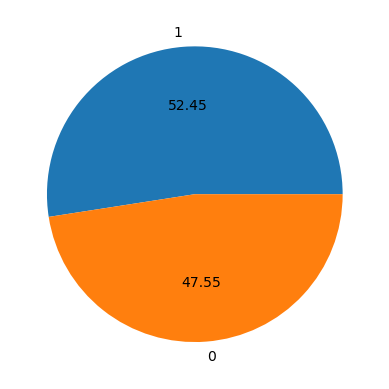

In [25]:
plt.pie(df['sarcas'].value_counts(), labels=['1','0'],autopct="%0.2f")
plt.show()

C:\Users\KEMENPAREKRAF\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


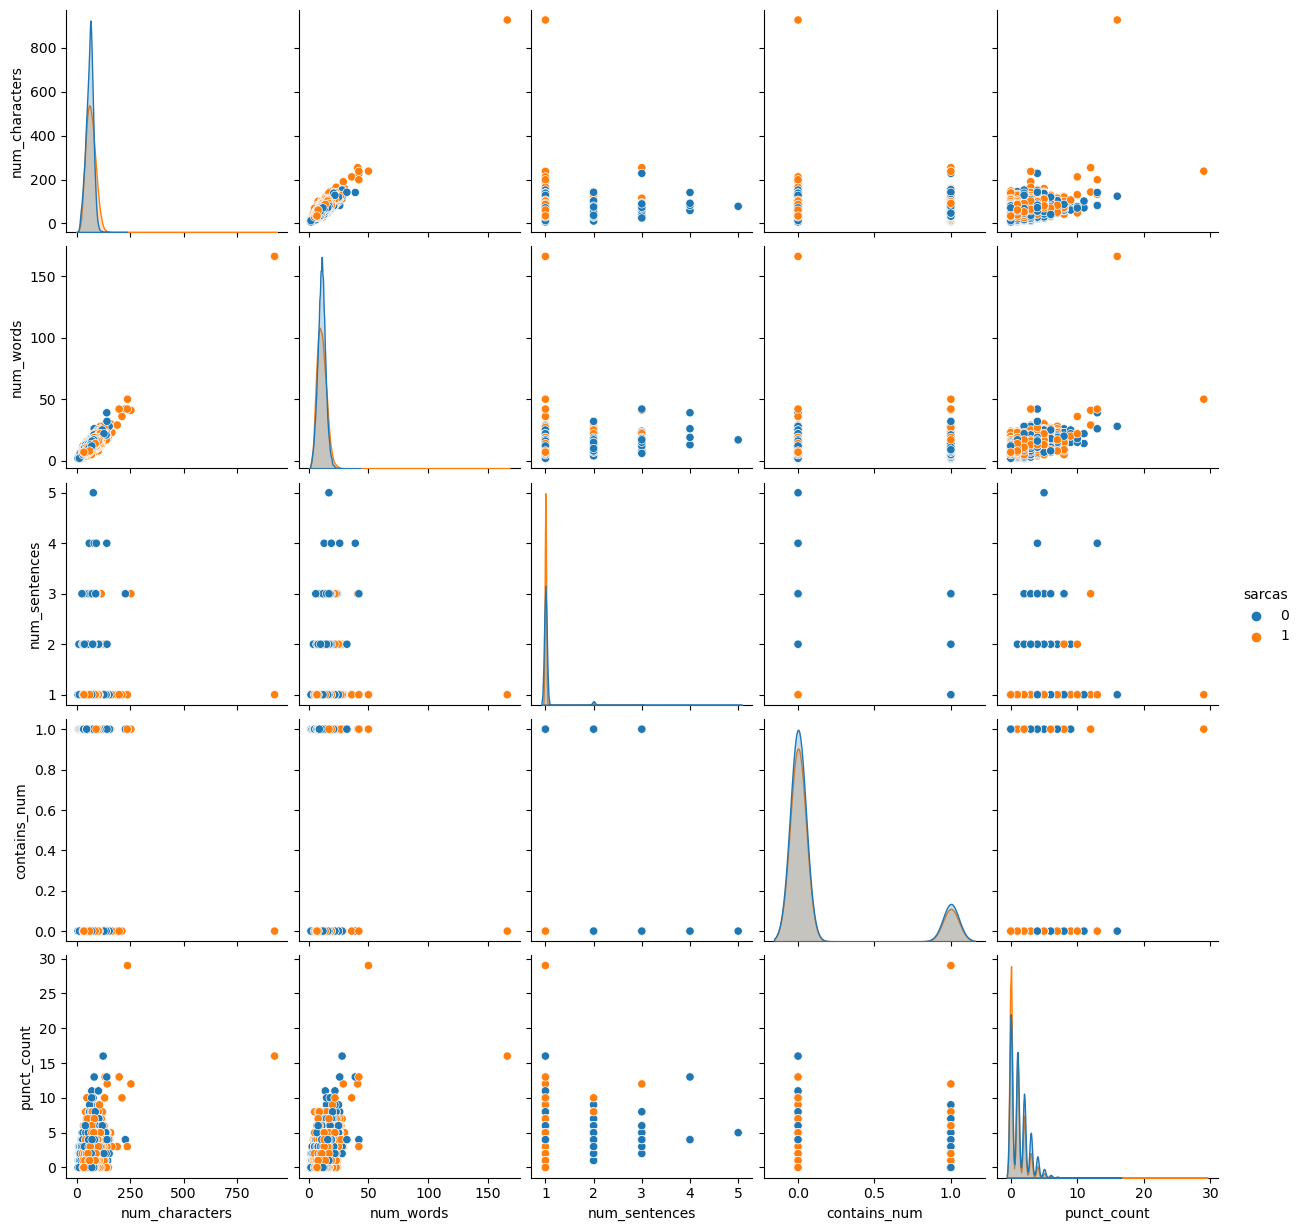

In [26]:
sns.pairplot(df,hue='sarcas')

In [28]:
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [29]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\KEMENPAREKRAF\AppData\Local\Temp\ipykernel_3772\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [30]:
df

,sarcas,text,num_characters,num_words,num_sentences,contains_num,punct_count,transformed_text
0,1,thirtysomething scientists unveil doomsday clo...,61,8,1,0,0,thirtysometh scientist unveil doomsday clock h...
1,0,dem rep. totally nails why congress is falling...,79,14,1,0,2,dem total nail congress fall short gender raci...
2,0,eat your veggies: 9 deliciously different recipes,49,8,1,1,1,eat veggi 9 delici differ recip
3,1,inclement weather prevents liar from getting t...,52,8,1,0,0,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,61,10,1,0,2,mother come pretti close use word correctli
...,...,...,...,...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,44,7,1,0,0,jew celebr rosh hashasha someth
28615,1,internal affairs investigator disappointed con...,87,14,1,0,1,intern affair investig disappoint conspiraci g...
28616,0,the most beautiful acceptance speech this week...,71,12,1,0,0,beauti accept speech week came queer korean
28617,1,mars probe destroyed by orbiting spielberg-gat...,61,8,1,0,1,mar probe destroy orbit space palac


In [31]:
# %pip install wordcloud

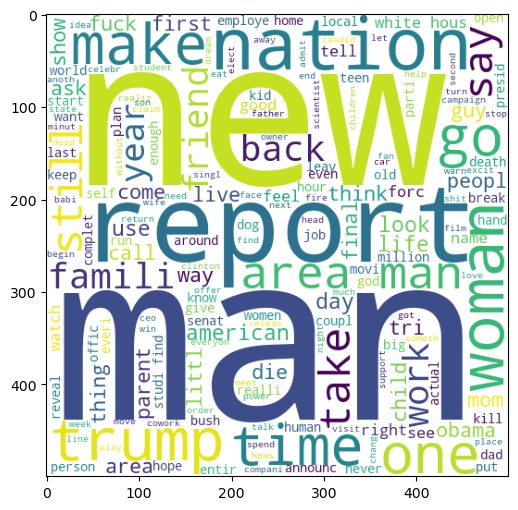

In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

sarcas_wc = wc.generate(df[df['sarcas'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(sarcas_wc)

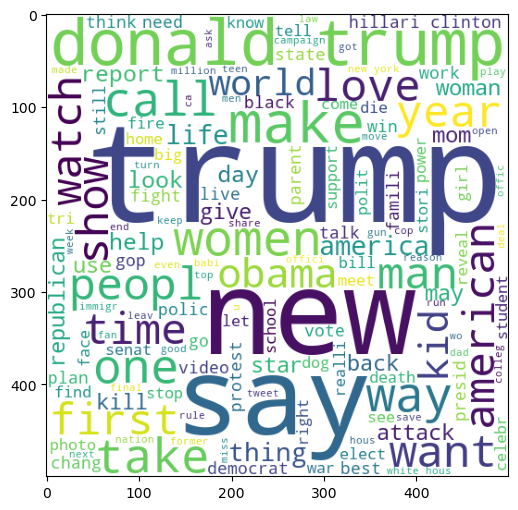

In [32]:
notsarcas_wc = wc.generate(df[df['sarcas'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(notsarcas_wc)

In [32]:
df = df.drop(columns=['text'])

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [33]:
df.head()

,sarcas,num_characters,num_words,num_sentences,contains_num,punct_count,transformed_text
0,1,61,8,1,0,0,thirtysometh scientist unveil doomsday clock h...
1,0,79,14,1,0,2,dem total nail congress fall short gender raci...
2,0,49,8,1,1,1,eat veggi 9 delici differ recip
3,1,52,8,1,0,0,inclement weather prevent liar get work
4,1,61,10,1,0,2,mother come pretti close use word correctli


## Modelling Without Another Features

In [34]:
# Pisahkan data menjadi fitur dan label
X = df['transformed_text']
y = df['sarcas'].values

# Bagi dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform TF-IDF pada train set
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform TF-IDF pada test set
X_test_tfidf = tfidf.transform(X_test)

In [35]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# RANDOM FOREST
rf1 = RandomForestClassifier()
rf1.fit(X_train_tfidf, y_train)
y_train_pred_rf1 = rf1.predict(X_train_tfidf)
y_test_pred_rf1 = rf1.predict(X_test_tfidf)
print("Random Forest Done")

#DECISION TREE
dt1 = DecisionTreeClassifier()
dt1.fit(X_train_tfidf, y_train)
y_train_pred_dt1 = dt1.predict(X_train_tfidf)
y_test_pred_dt1 = dt1.predict(X_test_tfidf)
print("Decision Tree Done")

# XGBOOST
xgb1 = XGBClassifier()
xgb1.fit(X_train_tfidf, y_train)
y_train_pred_xgb1 = xgb1.predict(X_train_tfidf)
y_test_pred_xgb1 = xgb1.predict(X_test_tfidf)
print("XGBoost Done")

#KNN
knn1 = KNeighborsClassifier()
knn1.fit(X_train_tfidf, y_train)
y_train_pred_knn1 = knn1.predict(X_train_tfidf)
y_test_pred_knn1 = knn1.predict(X_test_tfidf)
print("KNN Done")

# LOGISTIC REGRESSION
lr1 = LogisticRegression()
lr1.fit(X_train_tfidf, y_train)
y_train_pred_lr1 = lr1.predict(X_train_tfidf)
y_test_pred_lr1 = lr1.predict(X_test_tfidf)
print("Logistic Regression Done")

Random Forest Done
Decision Tree Done
XGBoost Done
KNN Done
Logistic Regression Done


In [37]:
# Random Forest
print("Random Forest - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_rf1)}")
print(f"Precision: {precision_score(y_train, y_train_pred_rf1)}")
print(f"Recall: {recall_score(y_train, y_train_pred_rf1)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_rf1)}")
print()
print("Random Forest - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf1)}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf1)}")
print(f"Recall: {recall_score(y_test, y_test_pred_rf1)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_rf1)}")
print()
print("Random Forest - Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_rf1))
print('-' * 80)

# Decision Tree
print("Decision Tree - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_dt1)}")
print(f"Precision: {precision_score(y_train, y_train_pred_dt1)}")
print(f"Recall: {recall_score(y_train, y_train_pred_dt1)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_dt1)}")
print()
print("Decision Tree - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dt1)}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt1)}")
print(f"Recall: {recall_score(y_test, y_test_pred_dt1)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_dt1)}")
print()
print("Decision Tree - Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_dt1))
print('-' * 80)

# XGBoost
print("XGBoost - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_xgb1)}")
print(f"Precision: {precision_score(y_train, y_train_pred_xgb1)}")
print(f"Recall: {recall_score(y_train, y_train_pred_xgb1)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_xgb1)}")
print()
print("XGBoost - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_xgb1)}")
print(f"Precision: {precision_score(y_test, y_test_pred_xgb1)}")
print(f"Recall: {recall_score(y_test, y_test_pred_xgb1)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_xgb1)}")
print()
print("XGBoost - Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_xgb1))
print('-' * 80)

# KNN
print("KNN - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_knn1)}")
print(f"Precision: {precision_score(y_train, y_train_pred_knn1)}")
print(f"Recall: {recall_score(y_train, y_train_pred_knn1)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_knn1)}")
print()
print("KNN - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_knn1)}")
print(f"Precision: {precision_score(y_test, y_test_pred_knn1)}")
print(f"Recall: {recall_score(y_test, y_test_pred_knn1)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_knn1)}")
print()
print("KNN - Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_knn1))
print('-' * 80)

# Logistic Regression
print("Logistic Regression - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_lr1)}")
print(f"Precision: {precision_score(y_train, y_train_pred_lr1)}")
print(f"Recall: {recall_score(y_train, y_train_pred_lr1)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_lr1)}")
print()
print("Logistic Regression - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_lr1)}")
print(f"Precision: {precision_score(y_test, y_test_pred_lr1)}")
print(f"Recall: {recall_score(y_test, y_test_pred_lr1)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_lr1)}")
print()
print("Logistic Regression - Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_lr1))
print('-' * 80)

Random Forest - Training Metrics:
Accuracy: 0.9999561441978774
Precision: 1.0
Recall: 0.9999082484631617
F1 Score: 0.9999541221268983

Random Forest - Testing Metrics:
Accuracy: 0.7646027012804771
Precision: 0.7814512666380421
Recall: 0.6860158311345647
F1 Score: 0.7306302689682859

Random Forest - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      3048
           1       0.78      0.69      0.73      2653

    accuracy                           0.76      5701
   macro avg       0.77      0.76      0.76      5701
weighted avg       0.77      0.76      0.76      5701

--------------------------------------------------------------------------------
Decision Tree - Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Decision Tree - Testing Metrics:
Accuracy: 0.707419750920891
Precision: 0.691708836123005
Recall: 0.6698077647945722
F1 Score: 0.6805821524320184

Decision Tree - Clas

In [38]:
joblib.dump(lr1, 'log_reg_sarcasm.joblib')
print("logreg saved with joblib")

logreg saved with joblib


### Modelling with Other Features

In [38]:
# Define features and target variable
X_text = df['transformed_text']
X_num = df[['contains_num', 'num_characters', 'num_words', 'num_sentences', 'punct_count']]
y = df['sarcas']

# Split text data and numerical features
X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_num, y, test_size=0.2, random_state=42
)

In [39]:
# Fit and transform on training data
X_train_tfidf = tfidf.fit_transform(X_train_text)

# Transform on test data
X_test_tfidf = tfidf.transform(X_test_text)

In [40]:
from scipy.sparse import hstack

# Combine TF-IDF features with numerical features
X_train = hstack([X_train_tfidf, X_train_num])
X_test = hstack([X_test_tfidf, X_test_num])

In [41]:
X_train.shape

(22802, 15824)

In [42]:
# RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
print("Random Forest Done")

#DECISION TREE
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)
print("Decision Tree Done")

# XGBOOST
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)
print("XGBoost Done")

#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)
print("KNN Done")

# LOGISTIC REGRESSION
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)
print("Logistic Regression Done")

Random Forest Done
Decision Tree Done
XGBoost Done
KNN Done
Logistic Regression Done


C:\Users\KEMENPAREKRAF\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Fungsi untuk mencetak metrik evaluasi
def print_evaluation_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 30)

# Evaluasi model Random Forest
print_evaluation_metrics(y_train, y_train_pred_rf, "Random Forest (Train)")
print_evaluation_metrics(y_test, y_test_pred_rf, "Random Forest (Test)")

# Evaluasi model Decision Tree
print_evaluation_metrics(y_train, y_train_pred_dt, "Decision Tree (Train)")
print_evaluation_metrics(y_test, y_test_pred_dt, "Decision Tree (Test)")

# Evaluasi model XGBoost
print_evaluation_metrics(y_train, y_train_pred_xgb, "XGBoost (Train)")
print_evaluation_metrics(y_test, y_test_pred_xgb, "XGBoost (Test)")

# Evaluasi model KNN
print_evaluation_metrics(y_train, y_train_pred_knn, "KNN (Train)")
print_evaluation_metrics(y_test, y_test_pred_knn, "KNN (Test)")

# Evaluasi model Logistic Regression
print_evaluation_metrics(y_train, y_train_pred_lr, "Logistic Regression (Train)")
print_evaluation_metrics(y_test, y_test_pred_lr, "Logistic Regression (Test)")

Model: Random Forest (Train)
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
------------------------------
Model: Random Forest (Test)
Accuracy: 0.7897
F1 Score: 0.7619
Precision: 0.8052
Recall: 0.7230
------------------------------
Model: Decision Tree (Train)
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
------------------------------
Model: Decision Tree (Test)
Accuracy: 0.6953
F1 Score: 0.6705
Precision: 0.6749
Recall: 0.6660
------------------------------
Model: XGBoost (Train)
Accuracy: 0.8198
F1 Score: 0.8033
Precision: 0.8401
Recall: 0.7695
------------------------------
Model: XGBoost (Test)
Accuracy: 0.7753
F1 Score: 0.7500
Precision: 0.7775
Recall: 0.7245
------------------------------
Model: KNN (Train)
Accuracy: 0.7567
F1 Score: 0.7398
Precision: 0.7567
Recall: 0.7236
------------------------------
Model: KNN (Test)
Accuracy: 0.6332
F1 Score: 0.5993
Precision: 0.6095
Recall: 0.5895
------------------------------
Model: Logistic Regr

### TRY NAIVE BAYES MODEL WITH TFIDF

In [44]:
# Define features and target variable
X_text = df['transformed_text']
X_num = df[['contains_num', 'num_characters', 'num_words', 'num_sentences', 'punct_count']]
y = df['sarcas']

# Split text data and numerical features
X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_num, y, test_size=0.2, random_state=42
)

# Fit and transform on training data
X_train_tfidf = tfidf.fit_transform(X_train_text)

# Transform on test data
X_test_tfidf = tfidf.transform(X_test_text)

# Combine TF-IDF features with numerical features
X_train = hstack([X_train_tfidf, X_train_num]).toarray()
X_test = hstack([X_test_tfidf, X_test_num]).toarray()

In [45]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

# MULTINOMIAL NAIVE BAYES
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_train_pred_mnb = mnb.predict(X_train)
y_test_pred_mnb = mnb.predict(X_test)
print("Multinomial Naive Bayes Done")

# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_train_pred_gnb = gnb.predict(X_train)
y_test_pred_gnb = gnb.predict(X_test)
print("Gaussian Naive Bayes Done")

# BERNOULLI NAIVE BAYES
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_train_pred_bnb = bnb.predict(X_train)
y_test_pred_bnb = bnb.predict(X_test)
print("Bernoulli Naive Bayes Done")

Multinomial Naive Bayes Done
Gaussian Naive Bayes Done
Bernoulli Naive Bayes Done


In [46]:
# Multinomial Naive Bayes
print("Multinomial Naive Bayes - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_mnb)}")
print(f"Precision: {precision_score(y_train, y_train_pred_mnb)}")
print(f"Recall: {recall_score(y_train, y_train_pred_mnb)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_mnb)}")
print()
print("Multinomial Naive Bayes - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_mnb)}")
print(f"Precision: {precision_score(y_test, y_test_pred_mnb)}")
print(f"Recall: {recall_score(y_test, y_test_pred_mnb)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_mnb)}")
print()
print("Multinomial Naive Bayes - Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_mnb))
print('-' * 80)

# Gaussian Naive Bayes
print("Gaussian Naive Bayes - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_gnb)}")
print(f"Precision: {precision_score(y_train, y_train_pred_gnb)}")
print(f"Recall: {recall_score(y_train, y_train_pred_gnb)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_gnb)}")
print()
print("Gaussian Naive Bayes - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_gnb)}")
print(f"Precision: {precision_score(y_test, y_test_pred_gnb)}")
print(f"Recall: {recall_score(y_test, y_test_pred_gnb)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_gnb)}")
print()
print("Gaussian Naive Bayes - Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_gnb))
print('-' * 80)

# Bernoulli Naive Bayes
print("Bernoulli Naive Bayes - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_bnb)}")
print(f"Precision: {precision_score(y_train, y_train_pred_bnb)}")
print(f"Recall: {recall_score(y_train, y_train_pred_bnb)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_bnb)}")
print()
print("Bernoulli Naive Bayes - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_bnb)}")
print(f"Precision: {precision_score(y_test, y_test_pred_bnb)}")
print(f"Recall: {recall_score(y_test, y_test_pred_bnb)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_bnb)}")
print()
print("Bernoulli Naive Bayes - Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_bnb))
print('-' * 80)

Multinomial Naive Bayes - Training Metrics:
Accuracy: 0.8634330321901588
Precision: 0.8721675112343437
Recall: 0.8369575190384438
F1 Score: 0.8541998314448919

Multinomial Naive Bayes - Testing Metrics:
Accuracy: 0.7961761094544817
Precision: 0.7901907356948229
Recall: 0.7651715039577837
F1 Score: 0.7774798927613942

Multinomial Naive Bayes - Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      3048
           1       0.79      0.77      0.78      2653

    accuracy                           0.80      5701
   macro avg       0.80      0.79      0.79      5701
weighted avg       0.80      0.80      0.80      5701

--------------------------------------------------------------------------------
Gaussian Naive Bayes - Training Metrics:
Accuracy: 0.8589158845715288
Precision: 0.9499765698219307
Recall: 0.7440132122213047
F1 Score: 0.8344738873166967

Gaussian Naive Bayes - Testing Metrics:
Accuracy: 0.689

### TRY NAIVE BAYES MODEL WITH COUNT VECTORIZER

In [37]:
# Define features and target variable
X = df['transformed_text']
y = df['sarcas']

# Split text data and numerical features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Inisialisasi CountVectorizer
count_vectorizer = CountVectorizer()

# Fit dan transform pada data pelatihan
X_train = count_vectorizer.fit_transform(X_train)

# Transform pada data pengujian
X_test = count_vectorizer.transform(X_test)

# Convert sparse matrices to dense numpy arrays
X_train = X_train.toarray()
X_test = X_test.toarray()

In [38]:
# MULTINOMIAL NAIVE BAYES
mnb1 = MultinomialNB()
mnb1.fit(X_train, y_train)
y_train_pred_mnb1 = mnb1.predict(X_train)
y_test_pred_mnb1 = mnb1.predict(X_test)
print("Multinomial Naive Bayes Done")

# GAUSSIAN NAIVE BAYES
gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
y_train_pred_gnb1 = gnb1.predict(X_train)
y_test_pred_gnb1 = gnb1.predict(X_test)
print("Gaussian Naive Bayes Done")

# BERNOULLI NAIVE BAYES
bnb1 = BernoulliNB()
bnb1.fit(X_train, y_train)
y_train_pred_bnb1 = bnb1.predict(X_train)
y_test_pred_bnb1 = bnb1.predict(X_test)
print("Bernoulli Naive Bayes Done")

Multinomial Naive Bayes Done
Gaussian Naive Bayes Done
Bernoulli Naive Bayes Done


In [44]:
# Evaluasi Multinomial Naive Bayes
print("Multinomial Naive Bayes - Metrik Pelatihan:")
print(f"Akurasi: {accuracy_score(y_train, y_train_pred_mnb1)}")
print(f"Presisi: {precision_score(y_train, y_train_pred_mnb1)}")
print(f"Recall: {recall_score(y_train, y_train_pred_mnb1)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_mnb1)}")
print()
print("Multinomial Naive Bayes - Metrik Pengujian:")
print(f"Akurasi: {accuracy_score(y_test, y_test_pred_mnb1)}")
print(f"Presisi: {precision_score(y_test, y_test_pred_mnb1)}")
print(f"Recall: {recall_score(y_test, y_test_pred_mnb1)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_mnb1)}")
print()
print("Multinomial Naive Bayes - Laporan Klasifikasi pada Set Pengujian:")
print(classification_report(y_test, y_test_pred_mnb1))
print('-' * 80)

# Evaluasi Gaussian Naive Bayes
print("Gaussian Naive Bayes - Metrik Pelatihan:")
print(f"Akurasi: {accuracy_score(y_train, y_train_pred_gnb1)}")
print(f"Presisi: {precision_score(y_train, y_train_pred_gnb1)}")
print(f"Recall: {recall_score(y_train, y_train_pred_gnb1)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_gnb1)}")
print()
print("Gaussian Naive Bayes - Metrik Pengujian:")
print(f"Akurasi: {accuracy_score(y_test, y_test_pred_gnb1)}")
print(f"Presisi: {precision_score(y_test, y_test_pred_gnb1)}")
print(f"Recall: {recall_score(y_test, y_test_pred_gnb1)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_gnb1)}")
print()
print("Gaussian Naive Bayes - Laporan Klasifikasi pada Set Pengujian:")
print(classification_report(y_test, y_test_pred_gnb1))
print('-' * 80)

# Evaluasi Bernoulli Naive Bayes
print("Bernoulli Naive Bayes - Metrik Pelatihan:")
print(f"Akurasi: {accuracy_score(y_train, y_train_pred_bnb1)}")
print(f"Presisi: {precision_score(y_train, y_train_pred_bnb1)}")
print(f"Recall: {recall_score(y_train, y_train_pred_bnb1)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred_bnb1)}")
print()
print("Bernoulli Naive Bayes - Metrik Pengujian:")
print(f"Akurasi: {accuracy_score(y_test, y_test_pred_bnb1)}")
print(f"Presisi: {precision_score(y_test, y_test_pred_bnb1)}")
print(f"Recall: {recall_score(y_test, y_test_pred_bnb1)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_bnb1)}")
print()
print("Bernoulli Naive Bayes - Laporan Klasifikasi pada Set Pengujian:")
print(classification_report(y_test, y_test_pred_bnb1))
print('-' * 80)

Multinomial Naive Bayes - Metrik Pelatihan:
Akurasi: 0.87566880098237
Presisi: 0.8679503559043621
Recall: 0.8726488668685201
F1 Score: 0.8702932698906528

Multinomial Naive Bayes - Metrik Pengujian:
Akurasi: 0.7924925451675144
Presisi: 0.7744585511575803
Recall: 0.7817565020731247
F1 Score: 0.7780904145563685

Multinomial Naive Bayes - Laporan Klasifikasi pada Set Pengujian:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3048
           1       0.77      0.78      0.78      2653

    accuracy                           0.79      5701
   macro avg       0.79      0.79      0.79      5701
weighted avg       0.79      0.79      0.79      5701

--------------------------------------------------------------------------------
Gaussian Naive Bayes - Metrik Pelatihan:
Akurasi: 0.8015086395930181
Presisi: 0.996726422447389
Recall: 0.5866593265437197
F1 Score: 0.7385930460898695

Gaussian Naive Bayes - Metrik Pengujian:
Akurasi: 0.653744957

In [46]:
joblib.dump(mnb1, 'multinomial_nb_model.joblib')
print("Multinomial Naive Bayes model saved with joblib")

Multinomial Naive Bayes model saved with joblib


In [49]:
try_text = 'I can’t wait to see the dentist!'
# Transform pada data pengujian
predict_text = count_vectorizer.transform([try_text])

# Convert sparse matrices to dense numpy arrays
predict_text = predict_text.toarray()

proba_predictions = mnb1.predict_proba(predict_text)

In [50]:
proba_predictions * 100

array([[13.38135838, 86.61864162]])

In [51]:
mnb1.predict(predict_text)

array([1], dtype=int64)

In [52]:
joblib.dump(count_vectorizer, 'count_vectorizer.joblib')
print("CV saved with joblib")

CV saved with joblib
